In [1]:
import pandas as pd
reviewdata = pd.read_csv('train.csv')

In [2]:
reviewdata.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [3]:
reviewdata.shape

(38932, 5)

In [5]:
reviewdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       38932 non-null  object
 1   Description   38932 non-null  object
 2   Browser_Used  38932 non-null  object
 3   Device_Used   38932 non-null  object
 4   Is_Response   38932 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [6]:
reviewdata.info

<bound method DataFrame.info of        User_ID                                        Description  \
0      id10326  The room was kind of clean but had a VERY stro...   
1      id10327  I stayed at the Crown Plaza April -- - April -...   
2      id10328  I booked this hotel through Hotwire at the low...   
3      id10329  Stayed here with husband and sons on the way t...   
4      id10330  My girlfriends and I stayed here to celebrate ...   
...        ...                                                ...   
38927  id49253  We arrived late at night and walked in to a ch...   
38928  id49254  The only positive impression is location and p...   
38929  id49255  Traveling with friends for shopping and a show...   
38930  id49256  The experience was just ok. We paid extra for ...   
38931  id49257  The Westin is a wonderfully restored grande da...   

            Browser_Used Device_Used Is_Response  
0                   Edge      Mobile   not happy  
1      Internet Explorer      Mobile 

In [8]:
reviewdata.describe()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
count,38932,38932,38932,38932,38932
unique,38932,38932,11,3,2
top,id10326,The room was kind of clean but had a VERY stro...,Firefox,Desktop,happy
freq,1,1,7367,15026,26521


In [7]:
reviewdata.describe().transpose()

,count,unique,top,freq
User_ID,38932,38932,id10326,1
Description,38932,38932,The room was kind of clean but had a VERY stro...,1
Browser_Used,38932,11,Firefox,7367
Device_Used,38932,3,Desktop,15026
Is_Response,38932,2,happy,26521


In [9]:
count = reviewdata.isnull().sum().sort_values(ascending=False)

In [10]:
percentage = ((reviewdata.isnull().sum()/len(reviewdata)*100)).sort_values(ascending=False)

In [11]:
missing_data = pd.concat([count, percentage], axis=1,
                        keys=['count','percentage'])

In [13]:
print('count and percentage of missing values')
missing_data

count and percentage of missing values


,count,percentage
User_ID,0,0.0
Description,0,0.0
Browser_Used,0,0.0
Device_Used,0,0.0
Is_Response,0,0.0


percentage of default
happy        68.12
not happy    31.88
Name: Is_Response, dtype: float64


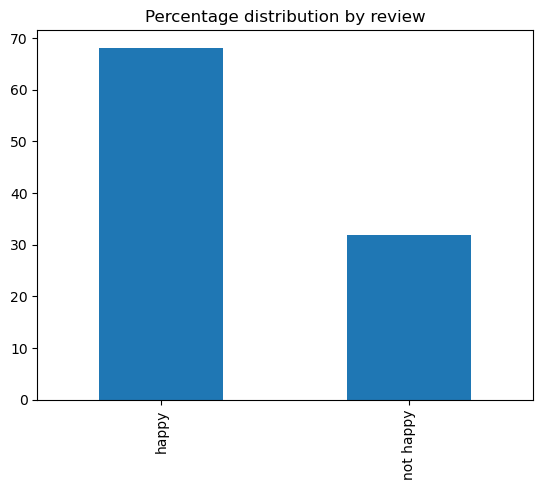

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
print('percentage of default')
print(round(reviewdata.Is_Response.value_counts(normalize=True)*100,2))
round(reviewdata.Is_Response.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage distribution by review')
plt.show()

In [15]:
reviewdata.drop(columns=['User_ID','Browser_Used','Device_Used'],inplace=True)

In [16]:
import re
import string

def text_clean(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*','',text)
    return text
clean = lambda x: text_clean(x)

In [17]:
reviewdata['cleaned_description'] = pd.DataFrame(reviewdata.Description.apply(clean))

In [21]:
def text_clean2(text):
    text = re.sub('[''"",,,]','',text)
    text = re.sub('\n','',text)
    return text
clean2 = lambda x: text_clean2

In [22]:
from sklearn.model_selection import train_test_split
independent_var = reviewdata.cleaned_description
dependent_var = reviewdata.Is_Response

IV_train,IV_test, DV_train, DV_test = train_test_split(independent_var, dependent_var, test_size=0.1,random_state=225)

print('IV Train',len(IV_train))
print('IV Test',len(IV_test))
print('DV Train',len(DV_train))
print('DV Train',len(DV_test))

IV Train 35038
IV Test 3894
DV Train 35038
DV Train 3894


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = 'lbfgs')
from sklearn.pipeline import Pipeline

In [30]:
model = Pipeline([('vectorizer', tvec), ('classifier',clf2)])
model.fit(IV_train, DV_train)

from sklearn.metrics import confusion_matrix

predictions = model.predict(IV_test)
confusion_matrix(predictions,DV_test)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[2421,  297],
       [ 150, 1026]], dtype=int64)

In [34]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
print('Accuracy',accuracy_score(predictions,DV_test))
print('Precision',precision_score(predictions,DV_test))
print('Recall',recall_score(predictions,DV_test))

Accuracy 0.8852080123266564


ValueError: pos_label=1 is not a valid label. It should be one of ['happy', 'not happy']

In [36]:
example = ["They lack interest in the project"]
result = model.predict(example)

print(result)

['not happy']
